In [6]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
# load the table of movies, studios, gross, and year.
top1 = Table.read_table('/Users/mt2245/Dropbox/INF_Syllabi/INF110/Spring_22/coding snippets/top_movies_2017.csv')
top1

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [19]:
# Here we'll format the table to include an index column 
# and label it 'Row Index'
# and add commas to the numbers for easier reading

top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')
top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [20]:
# Deterministic Samples
# Use .take to choose elements of the set
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


In [21]:
# Also use .where
# For instance, let's sample all the Harry Potter movies 

top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


In [24]:
# Systematic Sampling

"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

# do this multiple times to demonstrate how it is random.

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
14,Avatar,Fox,"760,507,625","865,082,100",2009
24,The Godfather,Paramount,"134,966,411","701,621,600",1972
34,Shrek 2,Dreamworks,"441,226,247","631,642,700",2004
44,Airport,Universal,"100,489,151","587,729,300",1970
54,Finding Nemo,Buena Vista,"380,843,261","547,504,100",2003
64,Back to the Future,Universal,"210,609,762","524,960,300",1985
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
84,Men in Black,Sony,"250,690,539","485,542,200",1997
94,Mrs. Doubtfire,Fox,"219,195,243","468,364,200",1993


In [26]:
# Empirical Distributions

# roll a die multiple times and keep track of the results.
# The table 'die' contais the numbers of spots.
# This is a fair die - what does that mean?
#    - all numbers appear exactly once.

die = Table().with_column('Face', np.arange(1,7,1))
die

Face
1
2
3
4
5
6


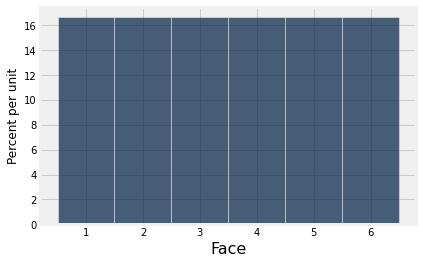

In [27]:
# Let's make a histogram to show the distribution of probabilities
# over all the possible faces.
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

In [ ]:
# the bars all represent the same chance, so this is
# a UNIFORM DISTRIBUTION.

In [28]:
# Let’s visualize some empirical distributions with empirical histograms
# Roll a die 10 times, using the table 'die' we created above.

die.sample(10)

Face
1
5
4
4
5
5
1
5
4
5


In [29]:
# Let's roll this many times and draw an empirical histogram.
# Since we want to do this a lot of times, let's make a function.

def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

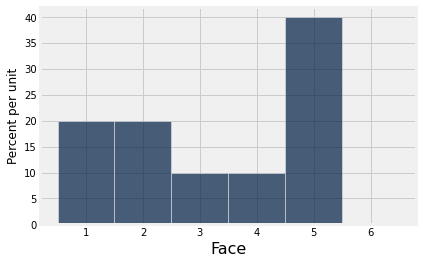

In [30]:
# now let's roll 10 times and make a histogram.

empirical_hist_die(10)

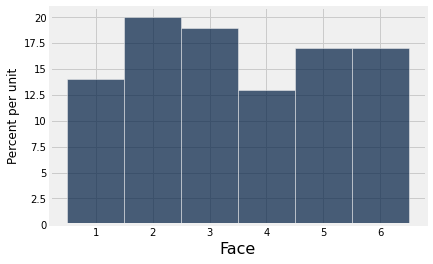

In [31]:
# increase the sample size
empirical_hist_die(100)

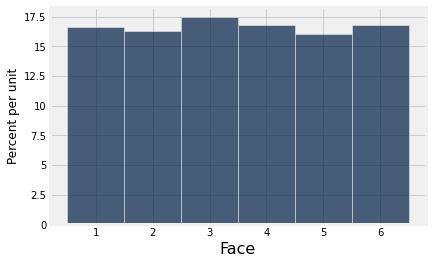

In [32]:
# increase the sample size
empirical_hist_die(10000)

In [33]:
# SAMPLING FROM A POPULATION
# Load the table of flight delay times.
united = Table.read_table('/Users/mt2245/Dropbox/INF_Syllabi/INF110/Spring_22/coding snippets/united_summer2015.csv')
united


Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [37]:
# Some flights left early!
# Also, some were REALLY LATE :-(
print(united.column('Delay').min())
print(united.column('Delay').max())


-16
580


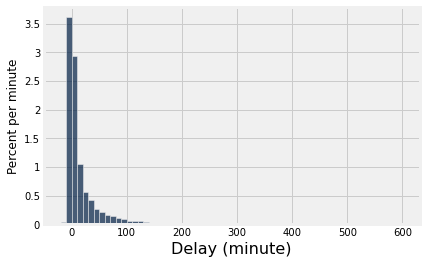

In [39]:
# we will look at the distribution of delay times
# using a histogram.
#
# let's create some bins for the histogram.
# we'll start at -20, and create 300 bins of 10
delay_bins = np.append(np.arange(-20, 301, 10),600)

united.hist('Delay', bins = delay_bins, unit = 'minute')


In [40]:
# let's zoom in because most times were <200min.
# To get an idea of how much were above 200min, 
# use .where to collect all the delays >200
# count the number of rows,
# and divide by the total number of rows.
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

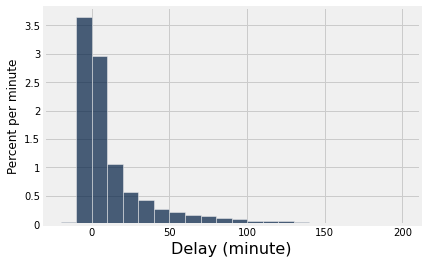

In [41]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [42]:
# How many delays were between 0 and 10 minutes?
# look at the histogram (second bin)

# but also let's measure:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

In [ ]:
# most delays are not THAT bad...

In [43]:
# EMPIRICAL DISTRIBUTION OF THE POPULATION SAMPLE
# Here we're going to draw random samples
# from 13,825 flights with replacement.
# Like before, let's make a function.

# it takes sample size as an argument
# and draws an empirical histogram
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

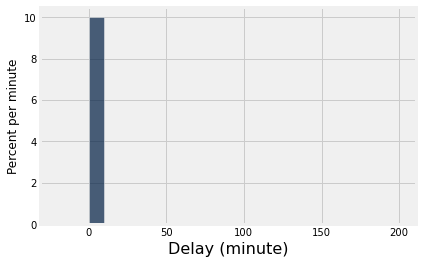

In [50]:
empirical_hist_delay(1)

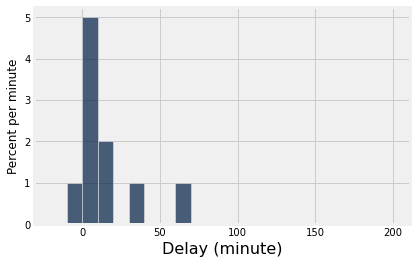

In [52]:
empirical_hist_delay(10)

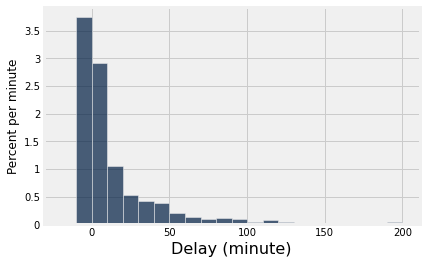

In [53]:
empirical_hist_delay(1000)

In [ ]:
# As sample size increases, the emprical histogram
# more closely resembles the histogram taken from 
# the population.

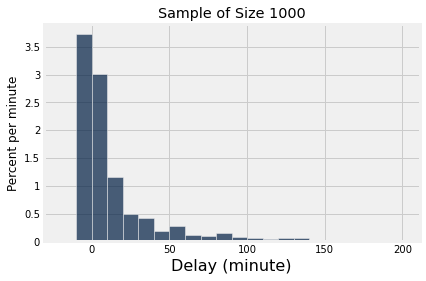

In [68]:
# let's create an emprical histogram
# of 1000 random samples from the data
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

In [54]:
# parameters
# what is the median delay?
np.median(united.column('Delay'))

2.0

In [55]:
# what proportion of flights were
# at or below the median delay?
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [56]:
# not bad!
# how many were exactly the median delay?
united.where('Delay', are.equal_to(2)).num_rows

480

In [69]:
# here, let's use the 1000 random samples
# to estimate the parameter "median delay"
np.median(sample_1000.column('Delay'))

2.0

In [74]:
# it MIGHT be different. Why?
# run this many times and see
np.median(united.sample(1000).column('Delay'))

2.0

In [75]:
# Step 1: we want the MEDIAN from a random sample
# of 1000 flight delays.

# Step 2: put the sampling code into a function
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [76]:
# Step 3: we'll do 5000 simulations.
# Step 4: Use the for loop.

# first, create an empty array to collect the results:
medians = make_array()

# then, generate the values with a for loop
# and append each iteration to the array.

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [77]:
# Let's display all this in a table based on the medians array.
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
3
2
2
2
3
2
3
2
2
1


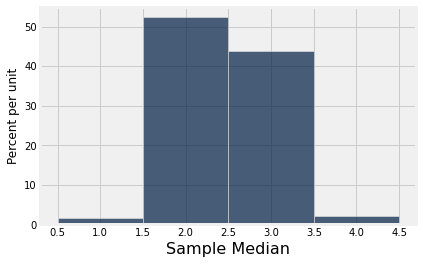

In [78]:
# let's visualize it with a histogram.
simulated_medians.hist(bins=np.arange(0.5, 5, 1))

# this is an EMPIRICAL HISTOGRAM OF THE STATISTIC.
# it displays the EMPIRICAL DISTRIBUTION of the statistic.